In [45]:
import pandas as pd
import datetime
import vk_api
import os
import requests
import json
import random
import numpy as np
from urllib.parse import urlencode

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys

Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика.

In [4]:
df = pd.read_csv('C:/Users/askha/Downloads/step_1_lesson_7.csv')

In [13]:
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


In [ ]:
https://api-metrika.yandex.net/stat/v1/data?

In [48]:
dates = ['2022-05-04', '2022-05-05', '2022-05-06']
url = 'https://api-metrika.yandex.net/stat/v1/data?'


df_days = pd.DataFrame()


for date in dates:
    params  = {
        'metrics' : 'ym:s:visits',
        'dimensions' : ['ym:s:date', 'ym:s:isRobot'],
        'filters' : f"ym:s:date=='{date}'",
        'id' : 44147844
    }
    
    visits = urlencode(params, doseq=True)
    
    visits_url = url + visits
    response = requests.get(visits_url)
    
    json_data = response.json()
    
    for record in json_data['data']:
        # Extract data
        intermediate_data = record['dimensions']
        
        visits = record['metrics'][0]
        date = intermediate_data[0]['name']
        robot_type = intermediate_data[1]['name']
        
        # Create row and append it to df
        row = [[date, robot_type, visits]]
        df_days = df_days.append(row)

In [54]:
df_days = df_days.rename(columns={ 0 : 'date', 1 : 'user_type', 2 : 'visits'})

In [55]:
df_days

,date,user_type,visits
0,2022-05-04,People,1251.0
0,2022-05-04,Robots,61.0
0,2022-05-05,People,1212.0
0,2022-05-05,Robots,57.0
0,2022-05-06,People,1066.0
0,2022-05-06,Robots,48.0


<AxesSubplot:xlabel='date', ylabel='visits'>

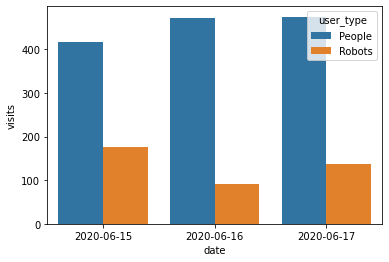

In [19]:
sns.barplot(x=df.date, y=df.visits, hue=df.user_type)

Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Данные лежат здесь.

Ответ округлите до целого.

In [21]:
step_2 = pd.read_csv('C:/Users/askha/Downloads/step_2_lesson_7.csv')

In [56]:
step_2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [70]:
url = 'https://api-metrika.yandex.net/stat/v1/data?'


df_browser = pd.DataFrame()


params  = {
    'metrics' : 'ym:s:visits',
    'dimensions' : ['ym:s:date', 'ym:s:browser'],
    'filters' : "ym:s:date=='2022-05-04'",
    'id' : 44147844
}

visits = urlencode(params, doseq=True)

visits_url = url + visits
response = requests.get(visits_url)

json_data = response.json()

for record in json_data['data']:
    # Extract data
    intermediate_data = record['dimensions']

    visits = record['metrics'][0]
    date = intermediate_data[0]['name']
    browser_type = intermediate_data[1]['name']

    # Create row and append it to df
    row = [[date, browser_type, visits]]
    df_browser = df_browser.append(row)

In [71]:
df_browser


,0,1,2
0,2022-05-04,Google Chrome,709.0
0,2022-05-04,Yandex Browser,216.0
0,2022-05-04,Edge,99.0
0,2022-05-04,Chrome Mobile,75.0
0,2022-05-04,Safari,67.0
0,2022-05-04,Firefox,59.0
0,2022-05-04,Opera,43.0
0,2022-05-04,Mobile Safari,12.0
0,2022-05-04,Android Browser,6.0
0,2022-05-04,MIUI,6.0


In [37]:
round(step_2.query('browser == "Google Chrome"').visits / step_2.visits.sum() * 100)

0    60.0
Name: visits, dtype: float64

Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?

In [65]:
step_3 = pd.read_csv('C:/Users/askha/Downloads/step_3_lesson_7.csv')

In [76]:
step_3.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


Сгруппируйте данные по браузерам и для каждого типа посчитайте сумму посещений (то есть все посещения, осуществлённые с этого браузера). Далее смёрджите этот датафрэйм с исходным по колонке с типом браузера. После этого разделите число посещений, разделённое по типу пользователя, на число посещений с этого браузера. То есть получите долю посещений от роботов и людей для каждого браузера. Потом возьмите браузер с максимальной долей

In [96]:
total_visits = step_3.groupby('browser', as_index=False) \
    .agg({'visits' : 'sum'}) \
    .rename(columns={ 'visits' : 'total_visits'})

In [98]:
merged_df = step_3.merge(total_visits, how='inner', on='browser')

In [103]:
robots_only = merged_df.query('user_type == "Robots"')

In [104]:
robots_only

,date,browser,user_type,visits,total_visits
1,2020-06-15,Google Chrome,Robots,104.0,354.0
3,2020-06-15,Yandex Browser,Robots,7.0,54.0
4,2020-06-15,Firefox,Robots,31.0,58.0
7,2020-06-15,Safari,Robots,22.0,41.0
10,2020-06-15,Mobile Safari,Robots,1.0,16.0
12,2020-06-15,Opera,Robots,5.0,16.0
14,2020-06-15,Samsung Internet,Robots,1.0,9.0
15,2020-06-15,UCWEB,Robots,4.0,4.0
17,2020-06-15,Edge,Robots,1.0,5.0
20,2020-06-15,Chromium,Robots,1.0,2.0


In [105]:
(robots_only.visits / robots_only.total_visits).idxmax()

15

In [74]:
url = 'https://api-metrika.yandex.net/stat/v1/data?'


df_bots = pd.DataFrame()


params  = {
    'metrics' : 'ym:s:visits',
    'dimensions' : ['ym:s:date', 'ym:s:browser', 'ym:s:isRobot'],
    'filters' : "ym:s:date=='2022-05-04'",
    'id' : 44147844
}

visits = urlencode(params, doseq=True)

visits_url = url + visits
response = requests.get(visits_url)

json_data = response.json()

for record in json_data['data']:
    # Extract data
    intermediate_data = record['dimensions']

    visits = record['metrics'][0]
    date = intermediate_data[0]['name']
    user_type = intermediate_data[2]['name']
    browser_type = intermediate_data[1]['name']

    # Create row and append it to df
    row = [[date, browser_type, user_type, visits]]
    df_bots = df_bots.append(row)

In [106]:
df_bots.columns = ['date', 'browser_type', 'user_type', 'visits']

In [107]:
df_bots

,date,browser_type,user_type,visits
0,2022-05-04,Google Chrome,People,678.0
0,2022-05-04,Yandex Browser,People,202.0
0,2022-05-04,Edge,People,94.0
0,2022-05-04,Chrome Mobile,People,72.0
0,2022-05-04,Safari,People,67.0
0,2022-05-04,Firefox,People,59.0
0,2022-05-04,Opera,People,40.0
0,2022-05-04,Google Chrome,Robots,31.0
0,2022-05-04,Yandex Browser,Robots,14.0
0,2022-05-04,Mobile Safari,People,12.0


Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [108]:
step_4 = pd.read_csv('C:/Users/askha/Downloads/step_4_lesson_7.csv')

In [110]:
step_4.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [115]:
tot_visits = step_4.groupby('browser', as_index=False) \
    .agg({'visits' : 'sum'}) \
    .rename(columns={ 'visits' : 'total_visits'})

In [116]:
merged = step_4.merge(total_visits, how='inner', on='browser')

In [123]:
round(merged.query('browser == "Safari" and user_type == "People"').visits / merged.visits.sum() * 100, 1)

8    3.2
Name: visits, dtype: float64

In [111]:
url = 'https://api-metrika.yandex.net/stat/v1/data?'


df_4 = pd.DataFrame()


params  = {
    'metrics' : 'ym:s:visits',
    'dimensions' : ['ym:s:date', 'ym:s:browser', 'ym:s:isRobot'],
    'filters' : "ym:s:date=='2022-05-04'",
    'id' : 44147844
}

visits = urlencode(params, doseq=True)

visits_url = url + visits
response = requests.get(visits_url)

json_data = response.json()

for record in json_data['data']:
    # Extract data
    intermediate_data = record['dimensions']

    visits = record['metrics'][0]
    date = intermediate_data[0]['name']
    user_type = intermediate_data[2]['name']
    browser_type = intermediate_data[1]['name']

    # Create row and append it to df
    row = [[date, browser_type, user_type, visits]]
    df_4 = df_4.append(row)

In [113]:
df_4.columns = ['date', 'browser_type', 'user_type', 'visits']

In [149]:
df_4.reset_index(drop=True, inplace=True)

In [150]:
df_4

,date,browser_type,user_type,visits
0,2022-05-04,Google Chrome,People,678.0
1,2022-05-04,Yandex Browser,People,202.0
2,2022-05-04,Edge,People,94.0
3,2022-05-04,Chrome Mobile,People,72.0
4,2022-05-04,Safari,People,67.0
5,2022-05-04,Firefox,People,59.0
6,2022-05-04,Opera,People,40.0
7,2022-05-04,Google Chrome,Robots,31.0
8,2022-05-04,Yandex Browser,Robots,14.0
9,2022-05-04,Mobile Safari,People,12.0


## Google API

При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet. Далее отправьте ссылку на получившийся файл в Google SpreadSheet (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) при помощи VK API себе в личку ВКонтакте. 

In [158]:
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

In [165]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

my_mail = 'beeschool.grozny@gmail.com'

# Authorization
credentials = ServiceAccountCredentials.from_json_keyfile_name('credentials.json', scope)
gs = gspread.authorize(credentials)

In [137]:
# Name of the table in google sheets, 
# can be url for open_by_url
# or id (key) part for open_by_key
table_name = 'avg_ride_length'  # Your table
# Get this table
work_sheet = gs.open(table_name)

In [138]:
# Select 1st sheet
sheet1 = work_sheet.sheet1

# Get data in python lists format
data = sheet1.get_all_values()

In [139]:
data

[['',
  'all_trips_v2$member_casual',
  'all_trips_v2$day_of_week',
  'all_trips_v2$ride_length'],
 ['1', 'casual', 'Sunday', '3581.405388'],
 ['2', 'member', 'Sunday', '919.9746161'],
 ['3', 'casual', 'Monday', '3372.286923'],
 ['4', 'member', 'Monday', '842.5725694'],
 ['5', 'casual', 'Tuesday', '3596.359949'],
 ['6', 'member', 'Tuesday', '826.142747'],
 ['7', 'casual', 'Wednesday', '3718.661897'],
 ['8', 'member', 'Wednesday', '823.9996442'],
 ['9', 'casual', 'Thursday', '3682.984671'],
 ['10', 'member', 'Thursday', '823.9278033'],
 ['11', 'casual', 'Friday', '3773.835112'],
 ['12', 'member', 'Friday', '824.5305064'],
 ['13', 'casual', 'Saturday', '3331.913841'],
 ['14', 'member', 'Saturday', '968.933723']]

In [140]:
headers = data.pop(0)

In [141]:
headers

['',
 'all_trips_v2$member_casual',
 'all_trips_v2$day_of_week',
 'all_trips_v2$ride_length']

In [142]:
df = pd.DataFrame(data, columns=headers)

In [143]:
df

,,all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
0,1,casual,Sunday,3581.405388
1,2,member,Sunday,919.9746161
2,3,casual,Monday,3372.286923
3,4,member,Monday,842.5725694
4,5,casual,Tuesday,3596.359949
5,6,member,Tuesday,826.142747
6,7,casual,Wednesday,3718.661897
7,8,member,Wednesday,823.9996442
8,9,casual,Thursday,3682.984671
9,10,member,Thursday,823.9278033


In [166]:
# Create empty table
table_name = 'Test Karpov'
sheet1 = gs.create(table_name)


In [167]:
# Make it visible to other guys
sheet1.share(my_mail, perm_type='user', role='writer')

In [168]:
# Looks like spreadsheet should be already present at the dist (so, run code in create table section)
sheet = 'Master'
d2g.upload(df_4, table_name, sheet, credentials=credentials, row_names=True)

<Worksheet 'Master' id:1301193801>

In [171]:
spreadsheet_url = "https://docs.google.com/spreadsheets/d/%s" % sheet1.id

In [172]:
spreadsheet_url

'https://docs.google.com/spreadsheets/d/1PiG0JQY3haE71pCeCXpkv6TnotqiTJSMI93UZokbm9g'

# VK API

In [178]:
import vk_api
import numpy as np

In [175]:
token = '7466bd2dd8eb3ffcb7e7aacad80544fe9d20303398ca2d4916484239309011eb37149def0bd64716ee786'

In [182]:
vk_session = vk_api.VkApi(token=token)
vk = vk_session.get_api()

In [184]:
vk.messages.send(
    chat_id=1,
    random_id=np.random.randint(0, 2 ** 31),
    message=spreadsheet_url)

9

Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

In [185]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [193]:
combo_df = step_4.merge(df, how='inner', on=['date', 'browser', 'user_type'])

In [195]:
combo_df['ratio'] = combo_df.visits / combo_df.users

In [198]:
combo_df.query('browser == "Google Chrome" and user_type == "People"').round()

,date,browser,user_type,visits,users,ratio
0,2020-06-15,Google Chrome,People,250.0,240.0,1.0


In [199]:
combo_df

,date,browser,user_type,visits,users,ratio
0,2020-06-15,Google Chrome,People,250.0,240.0,1.041667
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.000000
2,2020-06-15,Yandex Browser,People,47.0,44.0,1.068182
3,2020-06-15,Firefox,Robots,31.0,29.0,1.068966
4,2020-06-15,Chrome Mobile,People,31.0,30.0,1.033333
5,2020-06-15,Firefox,People,27.0,26.0,1.038462
6,2020-06-15,Safari,Robots,22.0,20.0,1.100000
7,2020-06-15,Safari,People,19.0,17.0,1.117647
8,2020-06-15,Mobile Safari,People,15.0,14.0,1.071429
9,2020-06-15,Opera,People,11.0,10.0,1.100000


# The second miniproject

In [5]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
r = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?q=sunflowers')
res = r.json()

In [18]:
type(res)

dict

In [10]:
check_list = [2032,
16822570,
437329,
20149,
436524]

In [11]:
check_list

[2032, 16822570, 437329, 20149, 436524]

In [16]:
834765 in res.values()

False

In [39]:
sunflower_ids = res['objectIDs']

In [40]:
type(sunflower_ids)

list

In [41]:
sunflower_ids

[436524,
 484935,
 437112,
 210191,
 431264,
 397949,
 656530,
 480725,
 486590,
 375281,
 485308,
 705155,
 11922,
 2032,
 816522,
 343052,
 208554,
 20141,
 403496,
 360837,
 2019,
 207869,
 437115,
 400581,
 423400,
 707887,
 223828,
 682927,
 57922,
 649813,
 79739,
 193938,
 339347,
 208218,
 437984,
 202228,
 436534,
 761604,
 696949,
 704667,
 437329,
 436252,
 436580,
 363282,
 190739,
 207753,
 437526,
 347980,
 822570,
 487043,
 203893,
 367434,
 423237,
 839296,
 262423,
 367817,
 13644,
 820022,
 648617,
 761731,
 814626,
 207967,
 626832,
 262430,
 262428,
 707697,
 205386,
 262378,
 426804,
 664519,
 436121,
 436529,
 633526,
 747779,
 369073,
 436144,
 852414,
 427872,
 436530,
 436535,
 437980,
 724844,
 834585,
 834580,
 834765]

In [42]:
for elem in sunflower_ids:
    if elem in check_list:
        print(elem)

436524
2032
437329


In [34]:
r_test = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/objects/437980')
obj_test = r_test.json()

In [64]:
objec = obj_test['objectID']

In [49]:
obj_test

{'objectID': 437980,
 'isHighlight': False,
 'accessionNumber': '49.30',
 'accessionYear': '1949',
 'isPublicDomain': True,
 'primaryImage': 'https://images.metmuseum.org/CRDImages/ep/original/DP130999.jpg',
 'primaryImageSmall': 'https://images.metmuseum.org/CRDImages/ep/web-large/DP130999.jpg',
 'additionalImages': [],
 'constituents': [{'constituentID': 161947,
   'role': 'Artist',
   'name': 'Vincent van Gogh',
   'constituentULAN_URL': 'http://vocab.getty.edu/page/ulan/500115588',
   'constituentWikidata_URL': 'https://www.wikidata.org/wiki/Q5582',
   'gender': ''}],
 'department': 'European Paintings',
 'objectName': 'Painting',
 'title': 'Cypresses',
 'culture': '',
 'period': '',
 'dynasty': '',
 'reign': '',
 'portfolio': '',
 'artistRole': 'Artist',
 'artistPrefix': '',
 'artistDisplayName': 'Vincent van Gogh',
 'artistDisplayBio': 'Dutch, Zundert 1853–1890 Auvers-sur-Oise',
 'artistSuffix': '',
 'artistAlphaSort': 'Gogh, Vincent van',
 'artistNationality': 'Dutch',
 'artistB

In [50]:
test_df = pd.DataFrame()

In [51]:
test_df

""


In [73]:
test_df = pd.DataFrame({
                       'objectID': obj_test['objectID'],
                       'title':obj_test['title'],
                       'artistDisplayName':obj_test['artistDisplayName'],
                       'department':obj_test['department'],
                       'objectBeginDate':obj_test['objectBeginDate'],
                       'objectEndDate':obj_test['objectEndDate'],
                       'period':obj_test['period'],
                       'objectName':obj_test['objectName'],
                       'culture':obj_test['culture']},  index=[0])

In [74]:
test_df

,objectID,title,artistDisplayName,department,objectBeginDate,objectEndDate,period,objectName,culture
0,437980,Cypresses,Vincent van Gogh,European Paintings,1889,1889,,Painting,


In [92]:
api_df = pd.DataFrame()

In [43]:
sunflower_ids

[436524,
 484935,
 437112,
 210191,
 431264,
 397949,
 656530,
 480725,
 486590,
 375281,
 485308,
 705155,
 11922,
 2032,
 816522,
 343052,
 208554,
 20141,
 403496,
 360837,
 2019,
 207869,
 437115,
 400581,
 423400,
 707887,
 223828,
 682927,
 57922,
 649813,
 79739,
 193938,
 339347,
 208218,
 437984,
 202228,
 436534,
 761604,
 696949,
 704667,
 437329,
 436252,
 436580,
 363282,
 190739,
 207753,
 437526,
 347980,
 822570,
 487043,
 203893,
 367434,
 423237,
 839296,
 262423,
 367817,
 13644,
 820022,
 648617,
 761731,
 814626,
 207967,
 626832,
 262430,
 262428,
 707697,
 205386,
 262378,
 426804,
 664519,
 436121,
 436529,
 633526,
 747779,
 369073,
 436144,
 852414,
 427872,
 436530,
 436535,
 437980,
 724844,
 834585,
 834580,
 834765]

In [45]:
test_list = [834585,
 834580,
 834765]

In [75]:
dft = pd.DataFrame()

In [94]:
for ID in sunflower_ids:
    r_test = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{ID}')
    obj_test = r_test.json()
    try:
        
        test_df = pd.DataFrame({
                           'objectID': obj_test['objectID'],
                           'title':obj_test['title'],
                           'artistDisplayName':obj_test['artistDisplayName'],
                           'department':obj_test['department'],
                           'objectBeginDate':obj_test['objectBeginDate'],
                           'objectEndDate':obj_test['objectEndDate'],
                           'period':obj_test['period'],
                           'objectName':obj_test['objectName'],
                           'culture':obj_test['culture']},  index=[0])
        api_df = pd.concat([api_df, test_df])
        print(ID)
        
    except:
        continue

436524
484935
437112
210191
431264
397949
656530
480725
486590
375281
485308
705155
11922
2032
816522
343052
208554
20141
403496
360837
2019
207869
437115
400581
423400
707887
223828
682927
57922
649813
79739
193938
339347
208218
437984
202228
436534
761604
437329
436252
436580
363282
190739
207753
437526
347980
822570
487043
203893
367434
423237
262423
367817
13644
820022
648617
761731
814626
207967
626832
262430
262428
707697
205386
262378
426804
664519
436121
436529
633526
747779
369073
436144
852414
427872
436530
436535
437980
724844
834585
834580
834765


In [96]:
api_df.culture.value_counts()

                    71
American             8
Japan                1
British              1
Ancestral Pueblo     1
Name: culture, dtype: int64

In [86]:
len(sunflower_ids)

85

In [97]:
r = requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?departmentId=6&q=cat')
cats = r.json()

In [101]:
cat_ids = cats['objectIDs']

In [104]:
cat_ids

[49698,
 49470,
 53222,
 36221,
 60873,
 70541,
 752008,
 43402,
 47358,
 49467,
 54747,
 54626,
 55919,
 59775,
 55923,
 36075,
 50826,
 57204,
 53653,
 42922,
 56602,
 47051,
 47052,
 72842,
 69780,
 59121,
 38952,
 38177,
 39199,
 59903,
 59763,
 73809,
 49050,
 58462,
 45282,
 38160,
 38994,
 39092,
 38162,
 55948,
 54124,
 59248,
 36411,
 58779,
 73046,
 38949,
 671015,
 45065,
 42932,
 56780,
 42915,
 59249,
 36346,
 51660,
 670898,
 55914,
 39764,
 55967,
 69410,
 68841,
 55148,
 76442,
 37011,
 36621,
 58218,
 54445,
 57560,
 56070,
 41681,
 53590,
 58002,
 45667,
 50827,
 46723,
 36539,
 38452,
 54809,
 38951,
 39695,
 39698,
 39699,
 38158,
 38176,
 38462,
 75200,
 57106,
 38293,
 38315,
 53441,
 52995,
 52994,
 53005,
 50780,
 70582,
 73158,
 53422,
 671014,
 670965,
 75747,
 671023,
 53408,
 53203,
 53007,
 53200,
 53457,
 53231,
 53416,
 53001,
 53234,
 53414,
 52996,
 53006,
 53410,
 53176,
 53002,
 671016,
 670994,
 53419,
 761386,
 53221,
 53439,
 671056,
 53456,
 53010

In [105]:
check_cat = [49698,
 49470,
 53222]

In [116]:
cat_df = pd.DataFrame()

In [111]:
cat_ids_1000 = cat_ids[:1000]

In [118]:
for ID in cat_ids_1000:
    r_test = requests.get(f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{ID}')
    obj_test = r_test.json()
    try:
        
        test_df = pd.DataFrame({
                           'objectID': obj_test['objectID'],
                           'title':obj_test['title'],
                           'artistDisplayName':obj_test['artistDisplayName'],
                           'department':obj_test['department'],
                           'objectBeginDate':obj_test['objectBeginDate'],
                           'objectEndDate':obj_test['objectEndDate'],
                           'period':obj_test['period'],
                           'objectName':obj_test['objectName'],
                           'culture':obj_test['culture']},  index=[0])
        cat_df = pd.concat([cat_df, test_df])
        print(ID)
        
    except:
        continue

49698
49470
53222
36221
60873
70541
752008
43402
47358
49467
54747
54626
55919
59775
55923
36075
50826
57204
53653
42922
56602
47051
47052
72842
69780
59121
38952
38177
39199
59903
59763
73809
49050
58462
45282
38160
38994
39092
38162
55948
54124
59248
36411
58779
73046
38949
671015
45065
42932
56780
42915
59249
36346
51660
670898
55914
39764
55967
69410
68841
55148
76442
37011
36621
58218
54445
57560
56070
41681
53590
58002
45667
50827
46723
36539
38452
54809
38951
39695
39698
39699
38158
38176
38462
75200
57106
38293
38315
53441
52995
52994
53005
50780
70582
73158
53422
671014
670965
75747
671023
53408
53203
53007
53200
53457
53231
53416
53001
53234
53414
52996
53006
53410
53176
53002
671016
670994
53419
761386
53221
53439
671056
53456
53010
53219
54540
53446
53241
53187
53167
53179
671024
53178
72585
670961
55802
53427
43247
74421
53429
53165
53175
45657
53157
53190
53172
670891
670920
53449
56128
78227
667348
670943
48879
45812
670908
53660
670989
670916
670910
670949
670883
73352


In [120]:
cat_df.period.value_counts()

Edo period (1615–1868)                                          457
                                                                 95
Qing dynasty (1644–1911)                                         49
Ming dynasty (1368–1644)                                         48
Muromachi period (1392–1573)                                     30
                                                               ... 
Momoyama (1573–1615) or Edo (1615–1868) period                    1
late Edo (1615–1868)–early Meiji (1868–1912) period               1
Satavahana-Ikshvaku                                               1
Qing dynasty (1368–1644), possibly Kangxi period (1662–1722)      1
Shōwa period (1926–89)                                            1
Name: period, Length: 116, dtype: int64